In [184]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pygam import LogisticGAM
from scipy.optimize import curve_fit
from matplotlib import pyplot
from numpy import arange
pd.options.mode.chained_assignment = None

In [200]:
df = pd.read_csv('covid19vaccinesadministeredbydemographics.csv')
copy_df = df[['demographic_category', 'demographic_value', 'administered_date', 'cumulative_at_least_one_dose']].copy().set_index('demographic_category')
race_df = copy_df.drop(['Gender', 'Age Group'], axis=0)

# Separate into different data frames by race/ethnicity
race_copy_df = race_df[['demographic_value', 'administered_date', 'cumulative_at_least_one_dose']].copy().set_index('demographic_value')

white_df = race_copy_df.drop(['Latino', 'Multiracial','Asian', 'Other Race', 'Unknown', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
latino_df = race_copy_df.drop(['White', 'Multiracial','Asian', 'Other Race', 'Unknown', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
multiracial_df = race_copy_df.drop(['Latino', 'White','Asian', 'Other Race', 'Unknown', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
asian_df = race_copy_df.drop(['Latino', 'Multiracial','White', 'Other Race', 'Unknown', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
other_df = race_copy_df.drop(['Latino', 'Multiracial','Asian', 'White', 'Unknown', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
unknown_df = race_copy_df.drop(['Latino', 'Multiracial','Asian', 'Other Race', 'White', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
black_df = race_copy_df.drop(['Latino', 'Multiracial','Asian', 'Other Race', 'Unknown', 'White', 'Native Hawaiian or Other Pacific Islander', 'American Indian or Alaska Native'], axis=0)
native_df = race_copy_df.drop(['Latino', 'Multiracial','Asian', 'Other Race', 'Unknown', 'Black or African American', 'White', 'American Indian or Alaska Native'], axis=0)
indian_df = race_copy_df.drop(['Latino', 'Multiracial','Asian', 'Other Race', 'Unknown', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'White'], axis=0)

In [201]:
white_df['administered_date'] = pd.to_datetime(white_df['administered_date'])
white_df['day'] = (white_df['administered_date'] - white_df.iloc[-1]['administered_date']).dt.days
white_df['one_dose'] = (((white_df['cumulative_at_least_one_dose'] / 39512000 * 100) / 0.816) /0.7)
white_df = white_df.drop(columns=['cumulative_at_least_one_dose', 'administered_date'])
white_df = white_df.iloc[::-1]

# white_df.to_csv('white.csv')

white_df

,day,one_dose
demographic_value,,
White,0,0.001901
White,1,0.013576
White,2,0.049151
White,3,0.109144
White,4,0.140638
...,...,...
White,118,21.744338
White,119,22.025406
White,120,22.268263


In [202]:
latino_df['administered_date'] = pd.to_datetime(latino_df['administered_date'])
latino_df['day'] = (latino_df['administered_date'] - latino_df.iloc[-1]['administered_date']).dt.days
latino_df['one_dose'] = (((latino_df['cumulative_at_least_one_dose'] / 39512000 * 100) / 0.816) /0.7)
latino_df = latino_df.drop(columns=['cumulative_at_least_one_dose', 'administered_date'])
latino_df = latino_df.iloc[::-1]

latino_df

,day,one_dose
demographic_value,,
Latino,0,0.000558
Latino,1,0.005556
Latino,2,0.024152
Latino,3,0.052567
Latino,4,0.068212
...,...,...
Latino,118,16.119580
Latino,119,16.407799
Latino,120,16.637094


In [203]:
asian_df['administered_date'] = pd.to_datetime(asian_df['administered_date'])
asian_df['day'] = (asian_df['administered_date'] - asian_df.iloc[-1]['administered_date']).dt.days
asian_df['one_dose'] = (((asian_df['cumulative_at_least_one_dose'] / 39512000 * 100) / 0.816) /0.7)
asian_df = asian_df.drop(columns=['cumulative_at_least_one_dose', 'administered_date'])
asian_df = asian_df.iloc[::-1]

asian_df

,day,one_dose
demographic_value,,
Asian,0,0.001303
Asian,1,0.008870
Asian,2,0.033798
Asian,3,0.072014
Asian,4,0.093902
...,...,...
Asian,118,9.420697
Asian,119,9.602546
Asian,120,9.743330


In [204]:
black_df['administered_date'] = pd.to_datetime(black_df['administered_date'])
black_df['day'] = (black_df['administered_date'] - black_df.iloc[-1]['administered_date']).dt.days
black_df['one_dose'] = (((black_df['cumulative_at_least_one_dose'] / 39512000 * 100) / 0.816) /0.7)
black_df = black_df.drop(columns=['cumulative_at_least_one_dose', 'administered_date'])
black_df = black_df.iloc[::-1]

black_df

,day,one_dose
demographic_value,,
Black or African American,0,0.000182
Black or African American,1,0.001196
Black or African American,2,0.004293
Black or African American,3,0.009079
Black or African American,4,0.011866
...,...,...
Black or African American,118,2.253260
Black or African American,119,2.286092
Black or African American,120,2.313887


[4.87879883e+01 2.94503865e-02]


Text(0.5, 0.98, 'Percent of White Population with At Least 1 Dose')

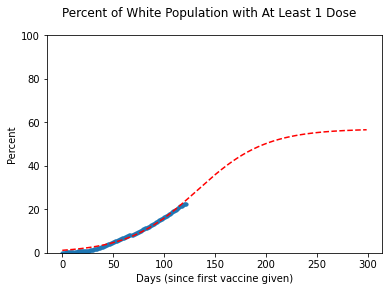

In [217]:
def log_reg(t, a, b):
        return 57/(1+a*np.exp(-b*t))
    
x = white_df['day'].values
y = white_df['one_dose'].values

popt, _ = curve_fit(log_reg, x, y)
print(popt)
a, b = popt

plt.scatter(x, y, s=10)
x_line = arange(min(x), 300, 1)
y_line = log_reg(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel('Days (since first vaccine given)')
plt.gca().set_ylim([0, 100])
plt.ylabel('Percent')
plt.suptitle('Percent of White Population with At Least 1 Dose')

[1.14589270e+02 3.26288801e-02]


Text(0.5, 0.98, 'Percent of Latino Population with At Least 1 Dose')

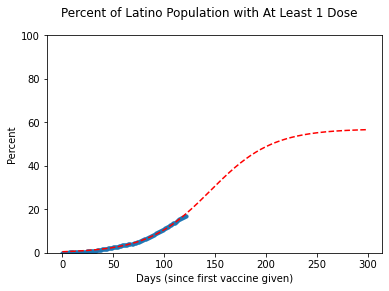

In [219]:
x = latino_df['day'].values
y = latino_df['one_dose'].values

popt, _ = curve_fit(log_reg, x, y)
print(popt)
a, b = popt

plt.scatter(x, y, s=10)
x_line = arange(min(x), 300, 1)
y_line = log_reg(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel('Days (since first vaccine given)')
plt.gca().set_ylim([0, 100])
plt.ylabel('Percent')
plt.suptitle('Percent of Latino Population with At Least 1 Dose')

[1.10228334e+02 2.63615525e-02]


Text(0.5, 0.98, 'Percent of Asian Population with At Least 1 Dose')

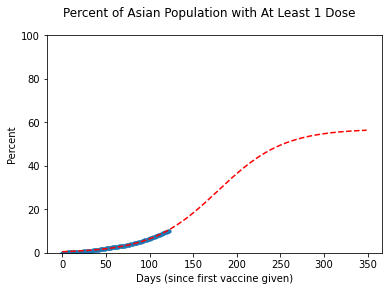

In [223]:
x = asian_df['day'].values
y = asian_df['one_dose'].values

popt, _ = curve_fit(log_reg, x, y)
print(popt)
a, b = popt

plt.scatter(x, y, s=10)
x_line = arange(min(x), 350, 1)
y_line = log_reg(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel('Days (since first vaccine given)')
plt.gca().set_ylim([0, 100])
plt.ylabel('Percent')
plt.suptitle('Percent of Asian Population with At Least 1 Dose')

[4.58353453e+02 2.53784410e-02]


Text(0.5, 0.98, 'Percent of Black Population with At Least 1 Dose')

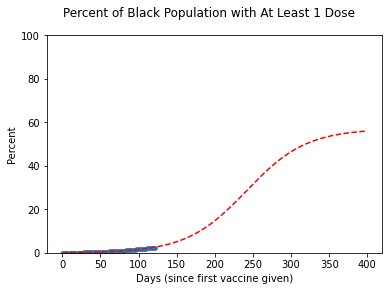

In [222]:
x = black_df['day'].values
y = black_df['one_dose'].values

popt, _ = curve_fit(log_reg, x, y)
print(popt)
a, b = popt

plt.scatter(x, y, s=10)
x_line = arange(min(x), 400, 1)
y_line = log_reg(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.xlabel('Days (since first vaccine given)')
plt.gca().set_ylim([0, 100])
plt.ylabel('Percent')
plt.suptitle('Percent of Black Population with At Least 1 Dose')

In [ ]:
x = np.array(white_df['day'].values)
x = x.reshape([1, len(x)])
y = np.array(white_df['one_dose'].values)
y = y.reshape([1, len(y)])
print(x, y)

x = np.array(white_df['day'].values)
x = x.reshape([len(x), 1])
y = white_df['one_dose'].values

gam = LogisticGAM().fit(x, y)
gam.summary()

# lams = np.random.rand(100, 11)
# lams = lams * 11 - 3
# lams = np.exp(lams)
# print(lams.shape)
# gam = LogisticGAM(n_splines=10).gridsearch(x, y)